# Capítulo 2 - Gradiente Descendente

## Nesse capítulo vamos estudar:

#### 1. [Definição de Regressão](#1)

#### 2. [Aquisição e Manipulação de Dados](#2)

#### 3.  [Visualisação de Dados](#3)

#### 4. [Princípios Básicos de Regressão Linear](#4)

#### 5. [Métodos de Avalição para Regressão](#5)

#### 6. [Equação Normal](#6)

#### 7. [Conclusão e Desafio](#7)
___
___
___

<a id="1"></a>
# 1. O que é uma Descida do Gradiente?

O **Gradiente Descendente** ou Descida do Gradiente, em inglês, *Gradient Descent*, é um método usado para otimizar funções matemáticas. Esse método consiste em avaliar uma função e otimiza-la usando o gradiente dessa função quantas vezes forem nescessárias até achar o seu ponto ótimo.

Por exemplo, nesse caso, vamos usar nossa função de custo MSE para otimizar uma Função Linear ***f(X) = MX + b***, que melhor se adapte à relação dos nossos dados.

O **Gradiente Descendente** é uma das melhores ferramentas para adaptarmos uma função aos nossos dados, principalmente conforme a escala dos nossos dados cresce, visto que uma simples **Equação Normal** tem um custo computacional muito alto com dados muito grandes. Outro ponto positivo do Gradiente Descendente é que é uma forma mais iterativa e interpretável, pois como veremos a seguir, podemos ter uma noção de todos os passos que nosso algoritmo tomou para chegar em uma resposta.

In [76]:
## Primeiramente, vamos verificar nosso ambiente e fazer a importação das bibliotecas nescessárias.

# Vamos usar uma versao do Python ≥ 3.5
import sys
assert sys.version_info >= (3, 5)
sys.path.append("..")

# E uma versao da Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

# Vamos importar Numpy para certos calculos matematicos e Pandas para analize e manipulação de dados.
import numpy as np
import pandas as pd

# Vamos definar a nossa random seed, para que os resultados sejam replicaveis.
np.random.seed(42)

# E finalmente, vamos importar a biblioteca MatplotLib e Seaborn para visualizar os dados.
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
mpl.rc('figure', figsize=(14,4.5))
mpl.rc('axes', titlesize=20)
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.facecolor'] = 'whitesmoke'
mpl.rcParams.update({"axes.grid" : True, "grid.color": "grey"})

#Para mostrar ilustracoes
from IPython.display import Image

### Nota: caso haja qualquer dúvida sempre Bibliotecas ou suas funções, as suas documentações estão disponíveis
### no arquivo README.txt. Você também pode usar a função "help(**insira a funcao aqui**)" para ter uma
### explicação detalhada dentro do notebook.

<a id="2"></a>
___
# 2. Conhecendo Nossos Dados

Vamos usar nesse capítulo um conjunto de dados sobre Preço de Habitação. Nesse dataset esta contido uma quantidade determinada de casas, com uma grande quantidade de informações sobre ela, como Área do Lote, Área Habitável, Quantidade de Cômodos, Tipo da Rua, Preço de Venda, etc. Imagine que uma imobiliária nos contratou para conseguir prever o preço de uma casa sem a nescessidade de uma visita de um avaliador. Vamos usar algumas informações desse dateset, para criar um algorítmo capaz de prever seu **Preço de Venda**.

<br>

In [77]:
# Vamos importar nosso dataset e fazer uma rápida analize.

house_prices = pd.read_csv("../datasets/house-prices/train.csv")
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [78]:
# Usando a função do Pandas describe() para avaliar diversas métricas estatísticas de cada coluna.
house_prices.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [79]:
# Vamos verificar o tipo de dado de cada coluna e se há dados faltando

house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

> Podemos ver que há diversas colunas com dados faltando, isso é um problema que devemos resolver caso decida-se usar essas colunas. De início, vamos usar apenas as informações da coluna "Área Habitavel"(GrLibArea), e compará-la com seus respectivos preços.

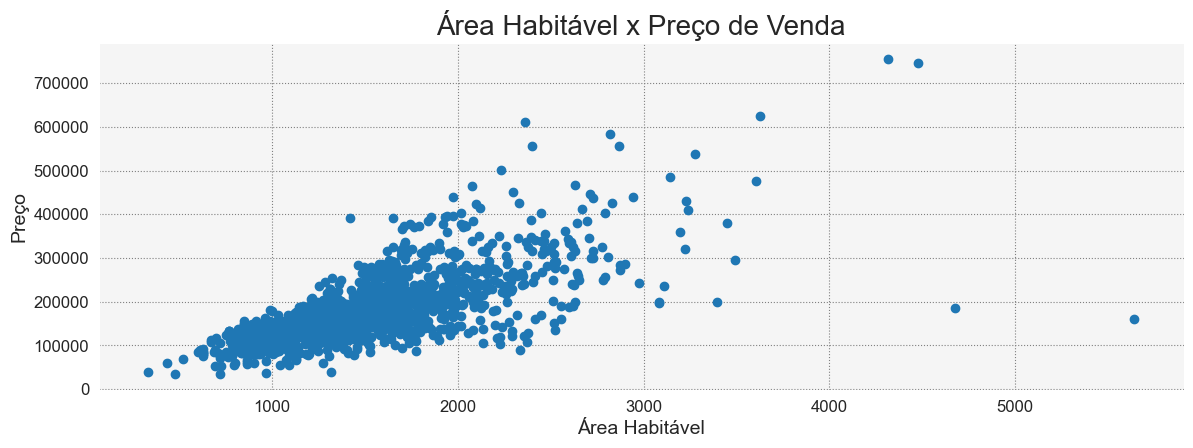

In [80]:
# Plotando um gráfico de Area Habitacional x Preço

X = house_prices.GrLivArea
y = house_prices.SalePrice

plt.title("Área Habitável x Preço de Venda", fontdict = {"fontsize" : 20})
plt.scatter(X, y)
plt.xlabel("Área Habitável")
plt.ylabel("Preço")

plt.show()

>Podemos reparar que há, como se deve imaginar, uma forte relação entre a **Área Habitável** de uma casa com seu respectivo **Preço**. De acordo com nosso gráfico, podemos ver a sua tendência, embora não perfeita, segue um certo padrão ascendente.

<a id="3"></a>
___
# 3. Preparando os Dados

Um Gradiente Descendente é muito sensível aos dados que são utilizados, principalmente à escala dos seus valores. Então vamos usar algumas técnicas para dividir esses dados entre o conjunto de **Treino e Teste** e padronizar sua escala, para que o nosso vetor de caracteŕisticas tenha a mesma escala que nosso vetor do rótulos.

In [81]:
# Dividindo os dados usando a bibliotaca SKLearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) 
#test_size indica a proporcao do cojunto de de testes

## Padronizando os Dados

Antes de treinarmos nosso modelo, precisamos padronizar nossos dados. O objetivo da padronização é mudar os valores das colunas numéricas no conjunto de dados para usar uma escala comum, sem distorcer as diferenças nos intervalos de valores nem perder informações. Nesse caso, vamos usando o método de **Padronização**, que situa a média dos dados em 0, e seu desvio padrão é igual à 1. Para isso, usamos a fórmulo *z-score*:

# <center>$$z(X) = \frac{X-\mu_X}{\sigma_X}$$</center>

In [82]:
def padronize(data):
    desvio_padrao = np.std(data)
    media = np.mean(data)
    return (data - media) / desvio_padrao

In [83]:
X_train = padronize(X_train)
X_test = padronize(X_test)
y_train = padronize(y_train)
y_test = padronize(y_test)

>Para evitar a contaminação de qualquer informação do nosso conjunto de treino passe para nosso conjunto de teste, é recomendável sempre, quando usando função transformadoras de dados, usar separadamente para cada conjunto.

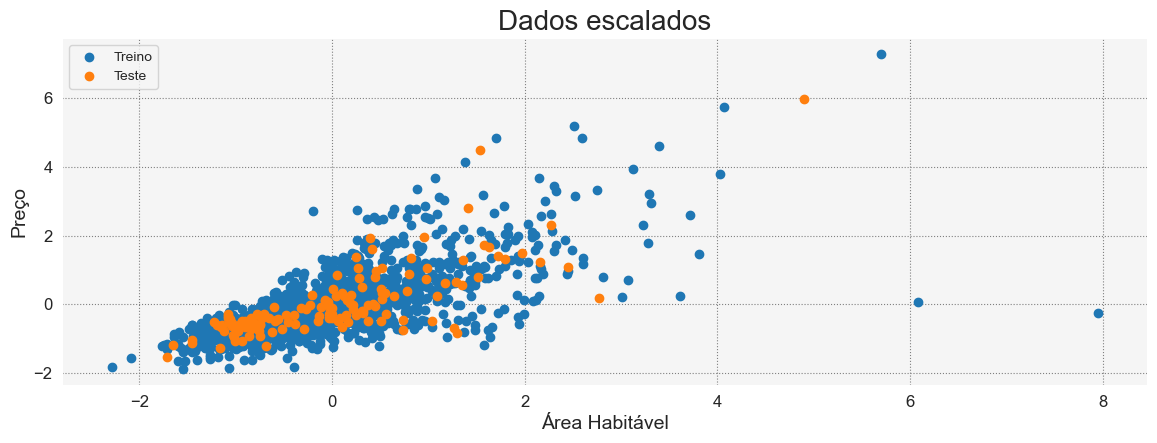

In [84]:
# Vamos plotar o grafico da relacao entre area e preço novamente para checar 
# se houve alteracao das suas caracteristicas ou apenas da suas escala
plt.title("Dados escalados", fontdict={"fontsize":20})
plt.scatter(X_train, y_train, label="Treino")
plt.scatter(X_test, y_test, label="Teste")
plt.legend(loc="upper left")
plt.xlabel("Área Habitável")
plt.ylabel("Preço")
plt.show()

In [85]:
#Antes de treinarmos nosso modelo, precisamos converter nossso vetores que são series do pandas em numpy ndarrays
X_train = X_train.to_numpy().reshape(-1,1)
y_train = y_train.to_numpy()
X_test = X_test.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy()

>Nossos conjuntos de dados foram devidamente separado e normalizado. Note que o gráfico mantém a distribuição geral e as proporções nos dados de origem.

<a id="4"></a>
___
# 4. Regressão Linear usando Gradiente Descendente 

## Como funciona:

1. Contruimos uma Função Linear com parâmetros fúteis, nesse caso, os parâmetros serão todos iguais a 0.

# <center> $$\hat{y} = 0X + 0 $$ </center>

2. Usando um Função Custo(Loss), para calcular o erro entre a previsão usando nossa Função Linear e os valores reais.

# <center> $$L(y, \hat{y}) = (y - \hat{y})² $$ </center>

3. Com o total das diferenças computadas, devemos calcular então o vetor gradiente da nossa Função Custo, ou seja, a sua derivada, para descobrirmos em qual direção devemos mudar cada parâmetro da nossa Função Linear para que esse custo encolha.

# <center> $$d_W = \frac{\partial{L}}{\partial{W}} = -2 X^T L $$ </center>
# <center> $$d_b = \frac{\partial{L}}{\partial{b}} = -2 L $$ </center>

4. Agora sabemos a direção para onde queremos alterar nossos parâmetros de pesos(W) e viés(b). O próximo passo é subtrair dos  parâmetros originais, esses gradientes.

# <center> $$W = W -\alpha .d_W $$ </center>
# <center> $$b = b -\alpha .d_b $$ </center>

*Caso tenho notado, estamos multiplicando nossos gradientes por um coeficiente escalar $\boldsymbol\alpha$. Esse coeficiênte é um hiperparâmetro conhecido como **Learning Rate**, ou Taxa de Aprendizado. Ele nos ajuda à reduzir a escala da mudança dos nossos parâmetros, para que eles não tenham uma mudança muito grande e ultrapasse o ponto ótimo.*

## Ilustrando a idéia:

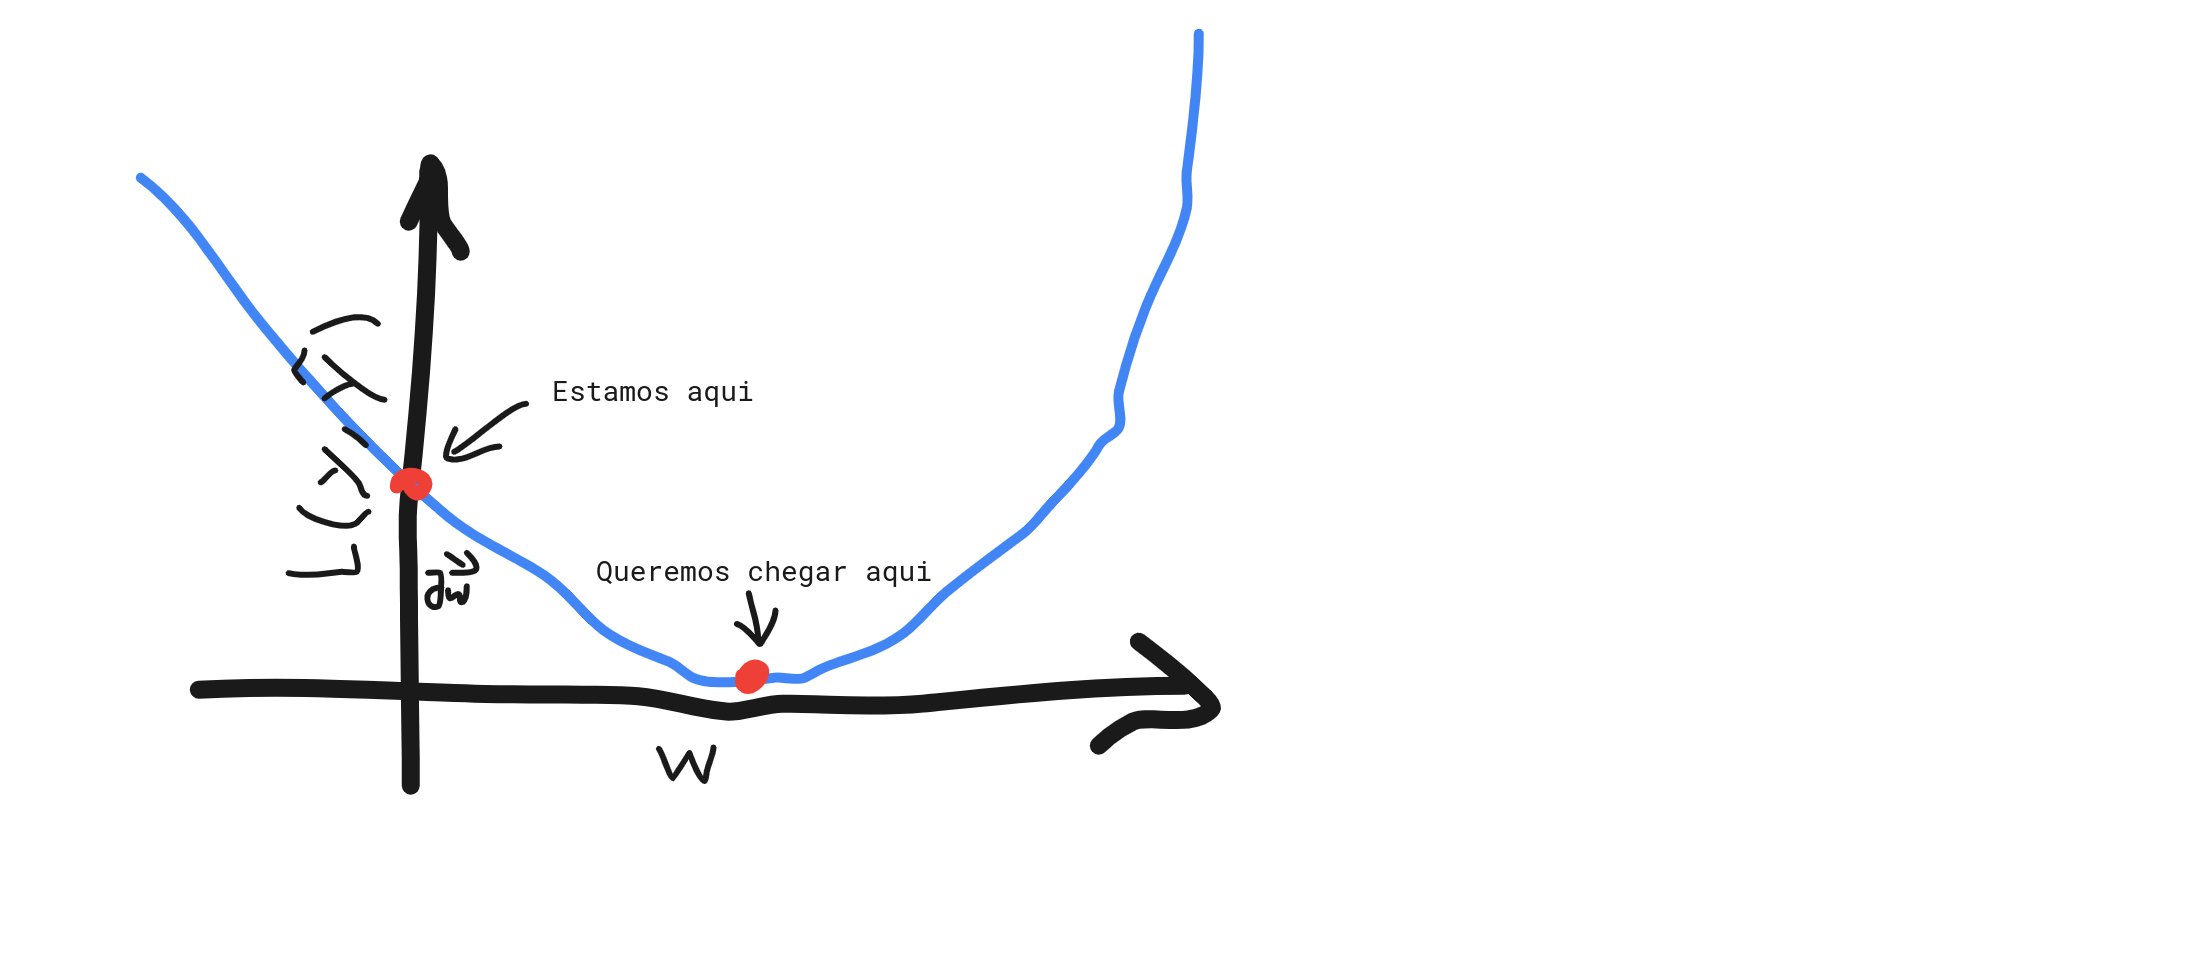

In [86]:
Image(filename="../images/ilustracao-gd.png") #A linha azul é o nossa funcao custo, ou o erro medio.

<a id="5"></a>
___
# 5. Criando Nossos Modelos

Nesse capítulo, vamos treinar três modelos distintos:

- Um modelo de Gradiente Descendente que vamos criar à mão.

- E um modelo de Gradiente Descendente da Scikit-Learn.

- Um modelo da Scikit-Learn que usa a Equação Normal, usando o método Moore-Penrose para calcular o pseudo-inverso da matriz.


## Vamos criar uma classe que efetua o Gradiente Descendente para uma Regressão Linear:

## Gradiente Descendente em Lote(Batch Gradient Descent)

Onde usamos todo o conjunto de dados em cada iteração da nossa Descida do Gradiente.

In [87]:
class LinearRegressionGD:
    """Essa classe efetua Regressao Linear usando Gradiente Descendente"""
    
    def __init__(self, learning_rate = 0.001, max_iter=1000, tol=1e-12):
        self.alpha = learning_rate       # taxa de aprendizado
        self.max_iter = max_iter         # limite maximo de iteracoes
        self.scores_log = []             # usaremos essa lista para guardar a pontuacao para cada iteracao
        self.tol = tol                   # Tolerancia para o tamanho da derivada,
                                         #se for muito pequena, a mudanca nos pesos e vies sera insignificante

    def fit(self, X, y):
        """A funcao "fit" e usada para computar os pesos e o vies, seguindo o algoritmo do Gradiente Descendente."""
        # inicio os pesos e o vies (coeficientes e intercepcao), em 0.
        self.weights = np.zeros((X.shape[1])).astype("float64")
        self.bias = 0.
        n_samples = X.shape[0]
        
        X_ = X.astype("float64")
        y_ = y.astype("float64")
        
        #inicio a iteracao, ate atingir a tolerancia ou o max_iter escolhido
        for it in range(self.max_iter): 
            #prevejo o resultado usando a funcao linear
            y_pred = self.predict(X_)

            #apos a previsao, calcula-se a funcao "loss",
            #que determina a distancia de cada previsao ao seu devido rotulo real ou seja, o erro 
            loss = self.loss(y_, y_pred)

            #com a funcao "loss" computada,
            #calcula-se agora as derivadas dos pesos e do vies em relacao a "loss"
            dw = -np.dot(X_.T , loss)  #derivada dos pesos 
            db = -np.mean(loss)        #derivada do vies

            #com as derivadas, posso computar os novos pesos e vies
            #os novos pesos sao os pesos antigos + as suas derivadas, multiplicadas pela taxa de aprendizagem
            self.weights -= self.alpha * dw
            self.bias -= self.alpha * db

            #adicionamos a media das diferenças ao nosso scores_log
            mae_ = np.mean(np.abs(y-y_pred))
            self.scores_log.append(mae_)
            
            #a cada 100 iterações, ou também chamada de épocas, imprimimos o erro absoluto médio
            if it%100==0: 
                print(f"MAE na iteração {it}: {mae_}")


            #apos cada iteração, se a derivada dos pesos atingir uma tolerancia mínima, o algorítmo é finalizado
            if sum(abs(dw))<self.tol:
                print("Tolerancia atingida na iteracao: ", it)
                break

            
    def predict(self, X):
        """Prevê o conjunto de amostras, baseados na função linear:
            f(X) = M+X * b
           M = pesos ou coeficientes angulares
           b = viéz ou coeficiente linear
           
           A função, np.dot() efetua o produto escalar do vetor de amostras e o vetor dos pesos.
        """
        return np.dot(X , self.weights) + self.bias
    
    def loss(self, y, y_pred):
        """Função Loss ou Funcao de Perda, ela nos define a distãncia entre os valores previstos e os reais."""
        return y-y_pred

## 5.1 - Treinando nosso modelo.

In [88]:
#Vamos usar nesse exemplo a gradiente descendente em batch,aconselho mudar os parametros e testar os outros
linreg_gd = LinearRegressionGD(learning_rate=0.00001, max_iter=3000)

#Agora treinamos nosso modelo
linreg_gd.fit(X_train, y_train)

#E com nosso modelo devidamente treinado, vamos fazer uma previsao do precos dados o conjunto teste X
linreg_gd_pred = linreg_gd.predict(X_test) #aqui guardamos nossas previsoes

print(f"Esse modelos nos retorna: \nCoeficiente Linear:{linreg_gd.bias:.5f}\nCoeficiente Angular: {float(linreg_gd.weights):.3f}")

MAE na iteração 0: 0.7289837447385542
MAE na iteração 100: 0.5034033108507019
MAE na iteração 200: 0.48445996059652263
MAE na iteração 300: 0.48405117362119426
MAE na iteração 400: 0.48431138520908573
MAE na iteração 500: 0.48440169505783964
MAE na iteração 600: 0.48443090995887417
MAE na iteração 700: 0.48443879723451927
MAE na iteração 800: 0.48444089850347105
MAE na iteração 900: 0.48444145830782004
MAE na iteração 1000: 0.48444160744670534
MAE na iteração 1100: 0.48444164717917104
MAE na iteração 1200: 0.48444165776439724
MAE na iteração 1300: 0.48444166058443405
MAE na iteração 1400: 0.484441661335727
MAE na iteração 1500: 0.4844416615358809
MAE na iteração 1600: 0.4844416615892045
MAE na iteração 1700: 0.48444166160341046
MAE na iteração 1800: 0.4844416616071951
MAE na iteração 1900: 0.4844416616082034
MAE na iteração 2000: 0.4844416616084721
MAE na iteração 2100: 0.4844416616085436
MAE na iteração 2200: 0.4844416616085626
MAE na iteração 2300: 0.4844416616085677
MAE na iteração 

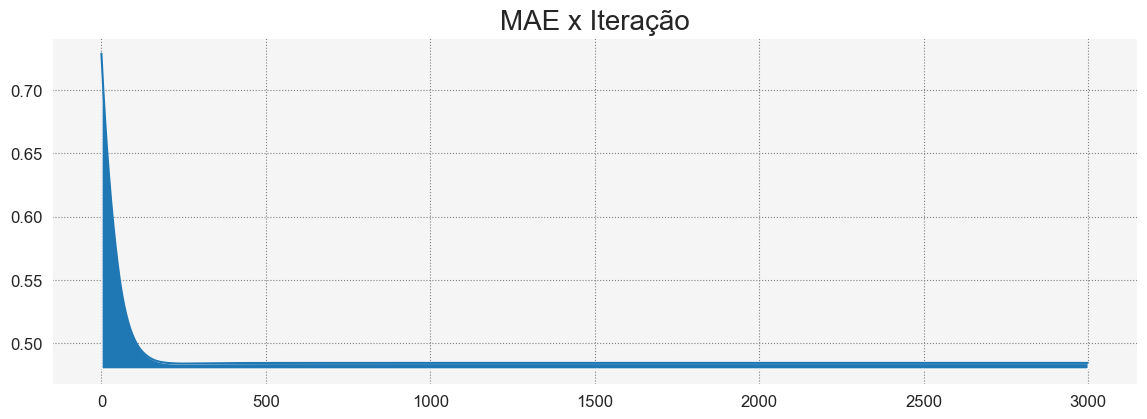

In [89]:
plt.title("MAE x Iteração", fontdict={"fontsize":20})
plt.plot(np.arange(3000), linreg_gd.scores_log)
plt.fill_between(np.arange(3000), 0.48, linreg_gd.scores_log)
plt.show()

___
## Gradiente Descendente Estocástico(Stochastic Gradient Descent)

Efetua a mesma função do **Grandiente Descendente em Lote**, porém em vez de usar o conjunto total de características em cada iteração, esse algorítmo escolhe uma amostra por por vez. Isso pode ajudar a melhorar a performance do algorítmo em conjuntos de dados muito grandes.

## 5.2 - Treinando o modelo de Gradiente Descendente Scikit-Learn

In [90]:
# Vamos testar agora a funcao de gradiente descendente do scikit-learn para compararmos
from sklearn.linear_model import SGDRegressor

sk_linreg_gd = SGDRegressor(max_iter=3000)
sk_linreg_gd.fit(X_train, y_train)
sk_linreg_gd_pred = sk_linreg_gd.predict(X_test)

print(f"Esse modelos nos retorna: \nCoeficiente Linear:{float(sk_linreg_gd.intercept_):.5f}\nCoeficiente Angular: {float(sk_linreg_gd.coef_):.3f}")

Esse modelos nos retorna: 
Coeficiente Linear:0.00350
Coeficiente Angular: 0.678


___
## 5.3 - Treinando o modelo de Equação Normal da Scikit-Learn

In [91]:
from sklearn.linear_model import LinearRegression

sk_linreg = LinearRegression(copy_X=True)
sk_linreg.fit(X_train, y_train)
sk_linreg_pred = sk_linreg.predict(X_test)

print(f"Esse modelos nos retorna: \nCoeficiente Linear:{sk_linreg.intercept_}\nCoeficiente Angular: {float(sk_linreg.coef_)}")

Esse modelos nos retorna: 
Coeficiente Linear:-1.8277333071556668e-17
Coeficiente Angular: 0.6983341682272167


___
## Comparando os Desempenhos
<br></br>

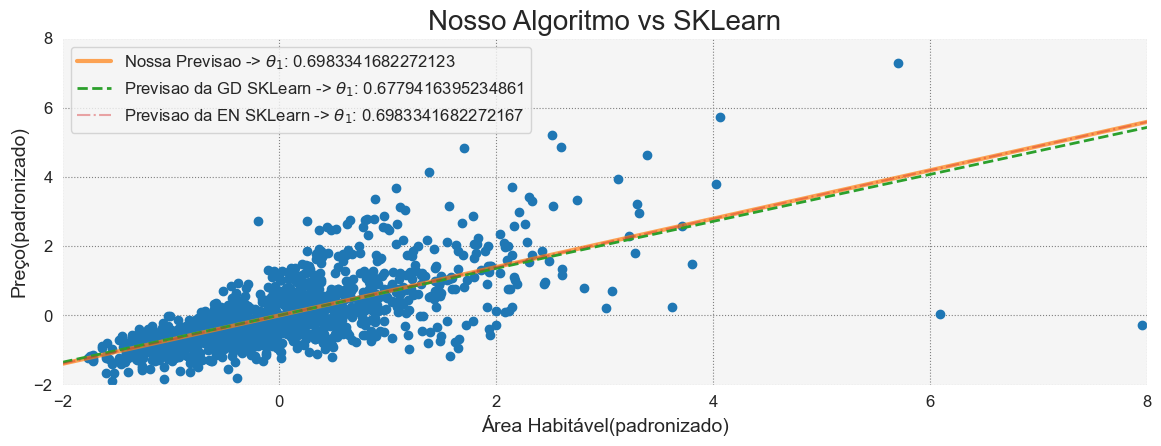

In [92]:
x = np.array([[np.round(X_train.min())], [np.ceil(X_train.max())]])
linreg_x_pred = linreg_gd.predict(x)
sk_linreg_gd_x_pred = sk_linreg_gd.predict(x)
sk_linreg_x_pred = sk_linreg.predict(x)


plt.title("Nosso Algoritmo vs SKLearn", fontdict={"fontsize":20})
plt.plot(X_train, y_train, "o")
plt.plot(x, linreg_x_pred, "-", label="Nossa Previsao -> "+r"$\theta_1$"+": "+str(float(linreg_gd.weights)), lw=3, alpha=0.7)
plt.plot(x, sk_linreg_gd_x_pred, "--", label="Previsao da GD SKLearn -> "+r"$\theta_1$"+": "+str(float(sk_linreg_gd.coef_)), lw=2)
plt.plot(x, sk_linreg_x_pred, ls= "-.", label="Previsao da EN SKLearn -> "+r"$\theta_1$"+": "+str(float(sk_linreg.coef_)), lw=1.5, alpha=0.4)

plt.axis([np.round(X_train.min()),np.ceil(X_train.max()),np.round(y_train.min()) , np.ceil(y_train.max())])
plt.xlabel("Área Habitável(padronizado)")
plt.ylabel("Preço(padronizado)")
plt.legend(loc="upper left",fontsize=12)

plt.show()

>Podemos notar que nosso algorítmo funcionou como esperado, se igualando aos algorítmos da Scikit-Learn. Vamos dar uma olhada na sua performance.

In [93]:
#As funcoes de pontuacao usadas no capítulo anterior foram alocadas em um modulo chamado de scores.py
from scores import pontuacao
pontuacoes = pontuacao(y_test, linreg_gd_pred, "Regressao Linear GD")
pontuacoes = pontuacoes.merge(pontuacao(y_test, sk_linreg_gd_pred, "Regressao Linear GD SKLearn"), how="outer")
pontuacoes = pontuacoes.merge(pontuacao(y_test, sk_linreg_pred, "Regressao Linear SKLearn"), how="outer")
pontuacoes

,Modelo,R²,MAE,MAPE,MSE,RMSE
0,Regressao Linear GD,0.605,0.398,1.318,0.395,0.629
1,Regressao Linear GD SKLearn,0.601,0.400,1.295,0.399,0.632
2,Regressao Linear SKLearn,0.605,0.398,1.318,0.395,0.629


> Como esperado após observar o gráfico das linhas geradas, as pontuacões são basicamente as mesmas.

<a id="6"></a>

# 6. Treinando um Modelo Multivariável

Até agora, estamos trabalhando com **Vetores de Características Simples**, ou seja, com apenas uma dimensão, ou um tipo de característica do dado. No nosso caso a Área Habitável da casa. Podemos adicionar mais características ao nosso vetor **X**, isso pode ajudar ao nosso modelo a encontrar uma relação mais profunda entre os dados e melhorar sua performance.

#### *Usando a Função Linear que discutimos no capítulo anterior como nossa Função Hipótese:*

# <center> $$h(X) = mX + b$$ </center>


- ***h(x)*** - função linear que retorna o vetor $\bf{\hat{y}}$, que é o vetor previsão.
- **X** - vetor de variáveis independentes.
- **m** - coeficiente angular da reta. - *Controla a inclinação*
- **b** - coeficente linear da reta.   - *Controla a altura, ou seja, onde a reta cruza o eixo* ***y***.

#### *Se vertorizarmos essa função para testar nossa hipótese:*

# <center> $$\it{h}_{\theta}(X) = \boldsymbol{\theta}X^T$$ </center>

<center> $\textbf{=}$ </center>

# <center> $$\theta_{0} + \theta_{1}x_{1} +... + \theta_{n}x_{n}$$ </center>

- ${\it{\bf{h}}_{\theta}(X)}$ - função hipótese que nos retorna o vetor previsão $\bf\hat{y}$
- ***x*** - cada característica do nosso vetor ***X***
- $\boldsymbol{\theta}$ - vetor de pesos, onde cada valor corresponde a uma característica
- $\boldsymbol{\theta_{0}}$ - viés




#### *Dessa forma, temos a liberdade de testar nossas hipóteses com mais de uma dimensão de características.*


Agora que construimos nosso algorítmo de Gradiente Descendente eficáz, vamos adicionar mais variáveis para verificar se nosso modelo consegue melhorar suas previsões.
___

In [94]:
# Vamos adicionar Area do Lote e o Ano Construido ao nosso conjunto X e padroniza-los
X_new = house_prices[["GrLivArea", "LotArea", "YearBuilt"]]

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X_new, y, test_size=0.1)

>Uma rapida maneira de padronizar os dados sem tem que criar uma função em todo novo projeto é usar a função de padronizacão "scale" da biblioteca da Scikit-Learn.

In [95]:
from sklearn.preprocessing import scale
new_X_train = scale(new_X_train)
new_X_test = scale(new_X_test)
new_y_train = scale(new_y_train)
new_y_test = scale(new_y_test)

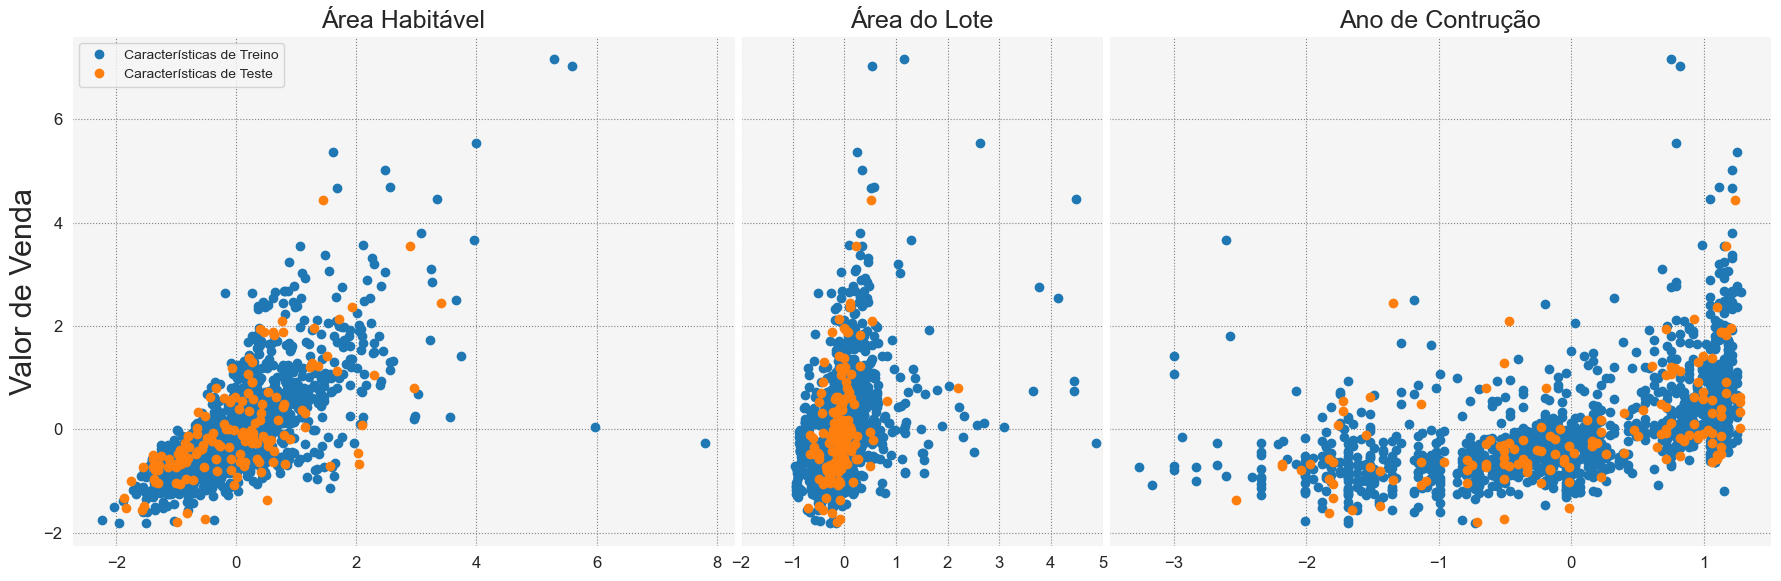

In [96]:
fig, ax = plt.subplots(1,3, sharey=True)   
fig.set_figwidth(16)
fig.set_figheight(4)

ax1, ax2, ax3 = ax


ax1.plot(new_X_train[:,0], new_y_train, "o", label="Características de Treino")
ax1.plot(new_X_test[:,0], new_y_test, "o", label="Características de Teste")
ax1.legend()
ax1.set_title("Área Habitável", fontdict={"fontsize":18})
ax1.set_ylabel("Valor de Venda", fontdict={"fontsize":22})


ax2.plot(new_X_train[:,1], new_y_train, "o", label="Características de Treino")
ax2.plot(new_X_test[:,1], new_y_test, "o", label="Características de Teste")
ax2.set_title("Área do Lote", fontdict={"fontsize":18})
ax2.set_xlim(-2,5)
ax2.set_aspect('equal')

ax3.plot(new_X_train[:,2], new_y_train, "o", label="Características de Treino")
ax3.plot(new_X_test[:,2], new_y_test, "o", label="Características de Teste")
ax3.set_title("Ano de Contrução", fontdict={"fontsize":18})


plt.tight_layout(pad=-5.8)

In [100]:
#Criando nosso novo modelo
new_linreg_gd = LinearRegressionGD(learning_rate=0.000001, max_iter=1000)

#Treinando com os novos conjuntos de treinamento
new_linreg_gd.fit(new_X_train, new_y_train)

#Obtendo suas predicoes sobre o conjunto de testes
new_linreg_gd_pred = new_linreg_gd.predict(new_X_test)
print(f"\nEsse modelos nos retorna: \nCoeficiente Linear:{new_linreg_gd.bias}\nCoeficientes Angulares: {new_linreg_gd.weights}")

MAE na iteração 0: 0.7210993246996722
MAE na iteração 100: 0.6340597055613899
MAE na iteração 200: 0.5663134360812654
MAE na iteração 300: 0.5129565834881081
MAE na iteração 400: 0.47082016153055845
MAE na iteração 500: 0.4383358057451653
MAE na iteração 600: 0.41491634456043497
MAE na iteração 700: 0.398347732503549
MAE na iteração 800: 0.38672947568709576
MAE na iteração 900: 0.3791922674937156

Esse modelos nos retorna: 
Coeficiente Linear:-2.1188665569272292e-19
Coeficientes Angulares: [0.46476713 0.12751926 0.33064652]


In [98]:
#Adicionando sua pontuacao ao conjunto de pontuacoes
pontuacoes = pontuacoes.merge(pontuacao(new_y_test, new_linreg_gd_pred, "Regressao Linear GD com 3 Variáveis"), how="outer")
pontuacoes

,Modelo,R²,MAE,MAPE,MSE,RMSE
0,Regressao Linear GD,0.605,0.398,1.318,0.395,0.629
1,Regressao Linear GD SKLearn,0.601,0.400,1.295,0.399,0.632
2,Regressao Linear SKLearn,0.605,0.398,1.318,0.395,0.629
3,Regressao Linear GD com 3 Variáveis,0.600,0.440,1.717,0.400,0.632


>Podemos observar que simplismente adicionando novas variáveis melhorou a capacidade preditiva do nosso modelo. 
<br>Porém nosso MAPE pode estar sendo afetado por outliers, por isso o grande erro.

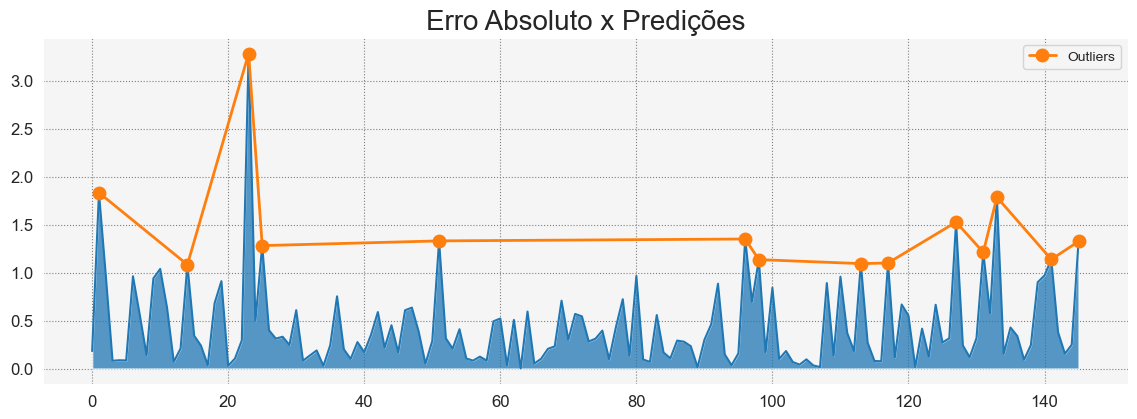

In [99]:
#Adquirindo e ordenando os 14 maiores Outliers do nosso conjunto de erros absolutos 
#Esse passo é totalmente ilustrativo

def picos(a, n=14):
    idx = np.argsort(a)[-n:]
    return idx

def ordenar(x, y):
    idx = np.argsort(x)
    x = x[idx]
    y = y[idx]
    return x, y

erros_abs = abs(new_y_test-new_linreg_gd_pred)
idxs = picos(erros_abs)

top_erros_abs = erros_abs[idxs]
new_xrange = np.arange(0, erros_abs.shape[0])[idxs]

new_xrange, top_erros_abs = ordenar(new_xrange, top_erros_abs)

plt.title("Erro Absoluto x Predições", fontdict={"fontsize": 20})
plt.plot(np.arange(0,erros_abs.shape[0]),erros_abs)
plt.plot(new_xrange, top_erros_abs, marker="o", label="Outliers", lw=2, ms=9)
plt.fill_between(np.arange(0,erros_abs.shape[0]), 0.,erros_abs, alpha=0.75)

plt.legend()
plt.show()

<a id="7"></a>
___
# 7 - Conclusão

Ao decorrer dos próximos capítulos, vamos notar cada vez mais que o desempenho de um modelo é ditado na maior parte pelos dados usados. Nesse capítulo entendemos o conceito de Gradiente Descendente, e como um exercício, eu te desafio à analizar novamente nosso conjunto de dados e encontrar alguma variável que não foi usada anteriormente e adiciona-la ao novo conjunto de treinamento que melhore ainda mais o desempenho do nosso modelo. Lembre-se de escalar e tratar os dados devidamente.

<div class="alert alert-block alert-success">
    <h1>Parabéns!</h1> <h3>Você completou o Capítulo 2 do livro: <b>Ensinando Máquinas - Do Zero a Redes Neurais</b></h3>
</div>